In [1]:
!!pip install opencv-python

    100% |████████████████████████████████| 51.6MB 17kB/s  eta 0:00:01    28% |█████████                       | 14.5MB 51kB/s eta 0:12:04    70% |██████████████████████▌         | 36.2MB 7.2MB/s eta 0:00:03    95% |██████████████████████████████▍ | 49.0MB 3.0MB/s eta 0:00:01
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
!pip install matplotlib

    100% |████████████████████████████████| 36.7MB 23kB/s eta 0:00:011    89% |████████████████████████████▊   | 32.9MB 4.3MB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 71kB 2.7MB/s ta 0:00:011
    100% |████████████████████████████████| 122kB 789kB/s ta 0:00:01
  Running setup.py install for matplotlib ... done
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [23]:
import sys

# Get user supplied values
imagePath = "/Users/akilesh/Documents/github/face_recognition/abba.png"
image_2 = "/Users/akilesh/Documents/github/face_recognition/crowd.jpg"
cascPath = "/Users/akilesh/Documents/github/face_recognition/haarcascade_frontalface_default.xml"

In [11]:
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

In [12]:
# Read the image
image = cv2.imread(imagePath)

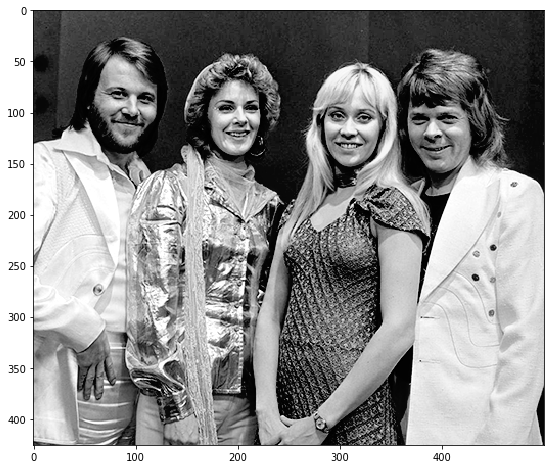

In [13]:
plt.figure(figsize=(12,8))
plt.imshow(image, cmap='gray')
plt.show()

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [15]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

print("Found {0} faces!".format(len(faces)))

Found 4 faces!


In [18]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

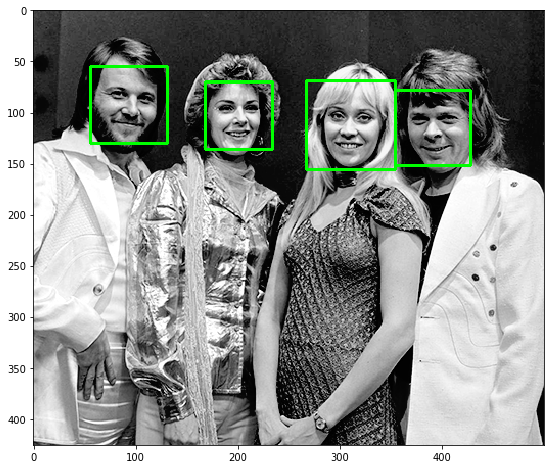

In [19]:
plt.figure(figsize=(12,8))
plt.imshow(image, cmap='gray')
plt.show()

### Combining all of the above into one single function

In [26]:
def detect_faces(image_path):
    # Create the haar cascade
    faceCascade = cv2.CascadeClassifier(cascPath)

    # Read the image
    image = cv2.imread(image_path)
    
    plt.figure(figsize=(12,8))
    plt.imshow(image, cmap='gray')
    plt.show()
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    print("Found {0} faces!".format(len(faces)))

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    plt.figure(figsize=(12,8))
    plt.imshow(image, cmap='gray')
    plt.show()

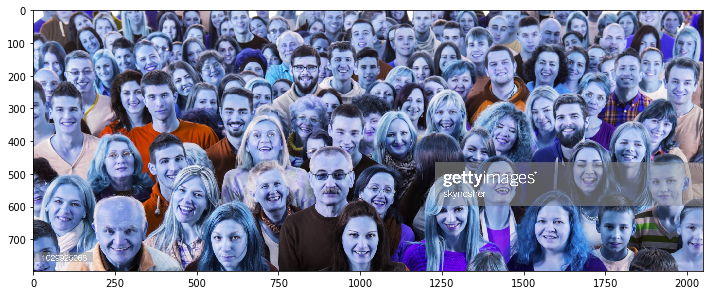

Found 77 faces!


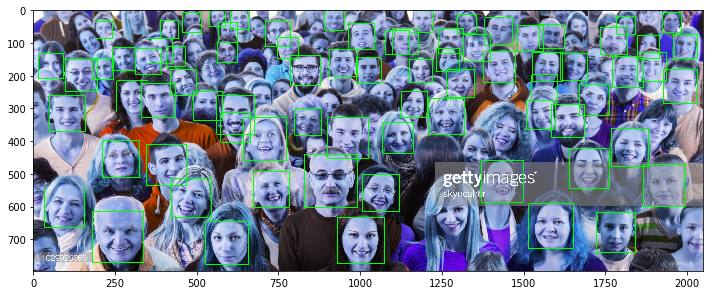

In [27]:
detect_faces(image_2)

### Live face streaming

In [28]:
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 